In [96]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

#For imputing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Misc
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
import os
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from plotly import tools

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

## Data Manipulation

1.

In [97]:
#Create a new empty dataframe to store the data.
generation_monthly = pd.DataFrame()

In [98]:
#Load the data from the xlsx file and exclude those row that are nit useful.
for i in range(0, 5):#There are two iterations because different years have different useless rows.
    new_data = pd.read_excel('../data/generation_monthly.xlsx', i, header = None, skiprows = 1)
    generation_monthly = generation_monthly.append(new_data)
for j in range(5, 14):
    new_data = pd.read_excel('../data/generation_monthly.xlsx', j, header = None, skiprows = 5)
    generation_monthly = generation_monthly.append(new_data)

In [99]:
#Assign the proper column names and reset the index.
generation_monthly = generation_monthly.rename(columns={0: 'YEAR', 1: 'MONTH', 2: 'STATE', 3: 'TYPE_OF_PRODUCER', 4: 'ENERGY_SOURCE', 5: 'GENERATION\n(Megawatthours)',}).reset_index()

In [100]:
#Select the rows that contains VA and total generation.
generation_monthly = generation_monthly.query('STATE in ["VA"] and ENERGY_SOURCE in ["Total"] and TYPE_OF_PRODUCER in ["Total Electric Power Industry"]')

In [101]:
#Convert the date to datetime format.
generation_monthly["DATE"] = pd.to_datetime(generation_monthly.YEAR.astype(str) + '/' + generation_monthly.MONTH.astype(str) )

In [102]:
#Select the columns we need.
generation_monthly = generation_monthly[['DATE', 'GENERATION\n(Megawatthours)']]

In [103]:
#Take a look.
generation_monthly

,DATE,GENERATION\n(Megawatthours)
1408,2001-01-01,7117068.0
3079,2001-02-01,5894142.0
4754,2001-03-01,6358233.0
6431,2001-04-01,6108458.0
8110,2001-05-01,5592002.0
...,...,...
452053,2020-08-01,10066339.0
454175,2020-09-01,7691990.0
456296,2020-10-01,7007291.0
458418,2020-11-01,6938746.0


2.

In [104]:
#Load the data from the xlsx file
price = pd.read_excel('../data/sales_revenue.xlsx', skiprows = 2)[['Year', 'Month', 'State', 'Cents/kWh.5']]

In [105]:
#Drop the last row because it contains nothing useful.
price.drop(price.tail(1).index,inplace=True)

In [106]:
#convert year to int for later datetime transform.
price['Year'] = price['Year'].astype('int')

In [107]:
#Select the rows that contains VA and year between 2000 and 2021.
price = price.query('State in ["VA"] and Year > 2000 and Year <2021')

In [108]:
#Convert the date to datetime format.
price["DATE"] = pd.to_datetime(price.Year.astype(str) + '/' + price.Month.astype('int').astype(str) )

In [109]:
#Select the columns we need and rename one of the col name.
price = price[['DATE', 'Cents/kWh.5']].rename(columns={'Cents/kWh.5': 'PRICE(Cents/kWh.5)'})

In [110]:
#Take a look.
price

,DATE,PRICE(Cents/kWh.5)
6777,2001-01-01,5.86
6828,2001-02-01,6.03
6879,2001-03-01,6.06
6930,2001-04-01,6.05
6981,2001-05-01,6.17
...,...,...
18762,2020-08-01,9.50
18813,2020-09-01,9.12
18864,2020-10-01,8.77
18915,2020-11-01,8.83


3.

In [111]:
#Create a new empty dataframe to store the data.
consumption_monthly = pd.DataFrame()

In [112]:
#Load the data from the xlsx file and exclude those row that are nit useful.
for i in range(0, 2):#There are two iterations because different years have different useless rows.
    new_data = pd.read_excel('../data/consumption_monthly.xlsx', i ,header = None, skiprows = 1)
    consumption_monthly = consumption_monthly.append(new_data)
for j in range(2, 11):
    new_data = pd.read_excel('../data/consumption_monthly.xlsx', j, header = None, skiprows = 5)
    consumption_monthly = consumption_monthly.append(new_data)

In [113]:
#Assign the proper column names and reset the index.
consumption_monthly = consumption_monthly.rename(columns={0: 'YEAR', 1: 'MONTH', 2: 'STATE', 3: 'TYPE_OF_PRODUCER', 4: 'ENERGY_SOURCE (UNITS)', 5: 'CONSUMPTION',}).reset_index()

In [114]:
#Convert the date to datetime format.
consumption_monthly["DATE"] = pd.to_datetime(consumption_monthly.YEAR.astype(str) + '/' + consumption_monthly.MONTH.astype(str) )

In [115]:
#Select the rows that contains VA and total consumption of fossil fuels.
consumption_monthly = consumption_monthly.query('STATE in ["VA"] and TYPE_OF_PRODUCER in ["Total Electric Power Industry"]')

In [116]:
#Select the rows we need and pivot from ling to wide.
consumption_monthly = consumption_monthly[['DATE', 'ENERGY_SOURCE (UNITS)', 'CONSUMPTION']].pivot(index = 'DATE', columns='ENERGY_SOURCE (UNITS)', values='CONSUMPTION').reset_index().fillna(0)

In [117]:
#Take a look.
consumption_monthly

ENERGY_SOURCE (UNITS),DATE,Coal (Short Tons),Natural Gas (Mcf),Other Gases (Billion BTU),Petroleum (Barrels)
0,2001-01-01,1394053.0,1744687.0,0.0,1019395.0
1,2001-02-01,1225213.0,809796.0,0.0,525230.0
2,2001-03-01,1312509.0,732833.0,0.0,1170501.0
3,2001-04-01,1142288.0,1217777.0,0.0,1085490.0
4,2001-05-01,1129454.0,1012305.0,0.0,400489.0
...,...,...,...,...,...
235,2020-08-01,336033.0,45822538.0,0.0,78779.0
236,2020-09-01,69319.0,36587665.0,0.0,69386.0
237,2020-10-01,27096.0,32076827.0,0.0,32886.0
238,2020-11-01,93992.0,25479817.0,0.0,54436.0


4.

In [118]:
#Read the data from csv file.
average_temperature = pd.read_csv('../data/average_temperature.csv')

In [119]:
#Drop the rows that contains useless information.
average_temperature.drop(average_temperature.head(3).index,inplace=True)
average_temperature.drop(average_temperature.tail(1).index,inplace=True)

In [120]:
#Convert the date to datetime format.
average_temperature['DATE'] = pd.to_datetime(average_temperature['Virginia'], format="%Y%m")

In [121]:
#Select the columns we need and rename one of the col name.
average_temperature = average_temperature[['DATE', ' Average Temperature']].rename(columns={' Average Temperature': 'AverageTemperature'})

In [122]:
#Take a look.
average_temperature

,DATE,AverageTemperature
3,2001-01-01,34.3
4,2001-02-01,41.2
5,2001-03-01,42.0
6,2001-04-01,56.6
7,2001-05-01,63.0
...,...,...
238,2020-08-01,75.5
239,2020-09-01,66.4
240,2020-10-01,59.0
241,2020-11-01,51.3


5.

In [123]:
#Read the data from csv file.
precipitation = pd.read_csv('../data/precipitation.csv')

In [124]:
#Drop the rows that contains useless information.
precipitation.drop(precipitation.head(3).index,inplace=True)
precipitation.drop(precipitation.tail(1).index,inplace=True)

In [125]:
#Convert the date to datetime format.
precipitation['DATE'] = pd.to_datetime(precipitation['Virginia'], format="%Y%m")

In [126]:
#Select the columns we need and rename one of the col name.
precipitation = precipitation[['DATE', ' Precipitation']].rename(columns={' Precipitation': 'Precipitation'})

In [127]:
#Add a columns named covid to indicate whether that month has covid. We can add it to any dataframe expect the one that is from google search. Add it here just for convenience.
precipitation['covid'] = np.where(precipitation['DATE'] > '2020-02-01', 1, 0)

In [128]:
#Take a look.
precipitation

,DATE,Precipitation,covid
3,2001-01-01,2.27,0
4,2001-02-01,2.01,0
5,2001-03-01,4.45,0
6,2001-04-01,1.64,0
7,2001-05-01,4.88,0
...,...,...,...
238,2020-08-01,8.20,1
239,2020-09-01,6.31,1
240,2020-10-01,5.07,1
241,2020-11-01,5.15,1


6.

In [129]:
#Read the data from csv file.
multiTimeline = pd.read_csv('../data/multiTimeline.csv').reset_index()

In [130]:
#Drop the rows that contains useless information.
multiTimeline.drop(multiTimeline.head(1).index,inplace=True)
multiTimeline.drop(multiTimeline.tail(11).index,inplace=True)

In [131]:
#Convert the date to datetime format.
multiTimeline['DATE'] = pd.to_datetime(multiTimeline['index'])

In [132]:
#Rename the column and select the columns we need.
multiTimeline = multiTimeline.rename(columns={'Category: All categories': 'internet_search'})[['DATE', 'internet_search']]

In [133]:
#Take a look.
multiTimeline

,DATE,internet_search
1,2004-01-01,43
2,2004-02-01,43
3,2004-03-01,42
4,2004-04-01,46
5,2004-05-01,42
...,...,...
200,2020-08-01,72
201,2020-09-01,67
202,2020-10-01,69
203,2020-11-01,69


7.

In [134]:
#Read in the data.
coalprice = pd.read_csv('../data/Coal_shipments_to_the_electric_power_sector_price_by_plant_state_Quarterly.csv',header = 4)

In [135]:
#Convert the oringinal quarter columns to the form that pandas can identify.
coalprice[['q', 'year']] = coalprice.Quarter.str.split(' ', expand=True)
coalprice['new_quarter'] = coalprice.year + coalprice.q

In [136]:
#Convert the quarters to month date.
coalprice['DATE'] = coalprice['new_quarter'].astype("datetime64[ns]")

In [137]:
#Drop all useless columns.
coalprice = coalprice[['DATE', 'All coal : Virginia $/short ton']]

In [138]:
#Create new rows that is between quarters and fill the value with the same as the quarter.
coalprice = coalprice.set_index('DATE').resample('MS').bfill().reset_index().rename(columns={'All coal : Virginia $/short ton': 'coal_price'})

In [139]:
coalprice

,DATE,coal_price
0,2008-01-01,65.31
1,2008-02-01,66.04
2,2008-03-01,66.04
3,2008-04-01,66.04
4,2008-05-01,70.36
...,...,...
155,2020-12-01,53.35
156,2021-01-01,53.35
157,2021-02-01,53.96
158,2021-03-01,53.96


8.

In [140]:
Naturalgas_price = pd.read_excel('../data/NG_PRI_SUM_DCU_SVA_M.xls', 1, skiprows = 2)[['Date', 'Virginia Natural Gas Price Sold to Electric Power Consumers (Dollars per Thousand Cubic Feet)']]

In [141]:
#Convert the date to datetime format.
Naturalgas_price['DATE'] = pd.to_datetime(Naturalgas_price['Date'])

In [142]:
#Set the month to start at 01 not 15
Naturalgas_price['DATE'] = Naturalgas_price['DATE'] - pd.offsets.MonthBegin(1)

In [143]:
#Selet the columns we need and rename.
Naturalgas_price = Naturalgas_price[['DATE', 'Virginia Natural Gas Price Sold to Electric Power Consumers (Dollars per Thousand Cubic Feet)']].rename(columns={'Virginia Natural Gas Price Sold to Electric Power Consumers (Dollars per Thousand Cubic Feet)': 'naturalgas_price'})

In [144]:
Naturalgas_price

,DATE,naturalgas_price
0,1989-01-01,NaN
1,1989-02-01,NaN
2,1989-03-01,NaN
3,1989-04-01,NaN
4,1989-05-01,NaN
...,...,...
388,2021-05-01,3.19
389,2021-06-01,3.22
390,2021-07-01,3.74
391,2021-08-01,4.18


9.

In [145]:
petroleum_price = pd.read_csv('../data/SeriesExport-12-02-2021-15-49-40.csv',header = 6)[['Source','EIA, U.S. Energy Information Administration']].rename(columns={'Source': 'DATE', 'EIA, U.S. Energy Information Administration': 'petroleum_price'})

In [146]:
petroleum_price['DATE'] = pd.to_datetime(petroleum_price['DATE'], format="%Y%m")

In [147]:
petroleum_price

,DATE,petroleum_price
0,2021-09-01,NaN
1,2021-08-01,71.45
2,2021-07-01,NaN
3,2021-06-01,NaN
4,2021-05-01,67.03
...,...,...
160,2008-05-01,NaN
161,2008-04-01,NaN
162,2008-03-01,NaN
163,2008-02-01,NaN


11.

In [148]:
#Create a new dataframe containing only the price and date.
ts_dat = price[['DATE', 'PRICE(Cents/kWh.5)']].copy().set_index('DATE')

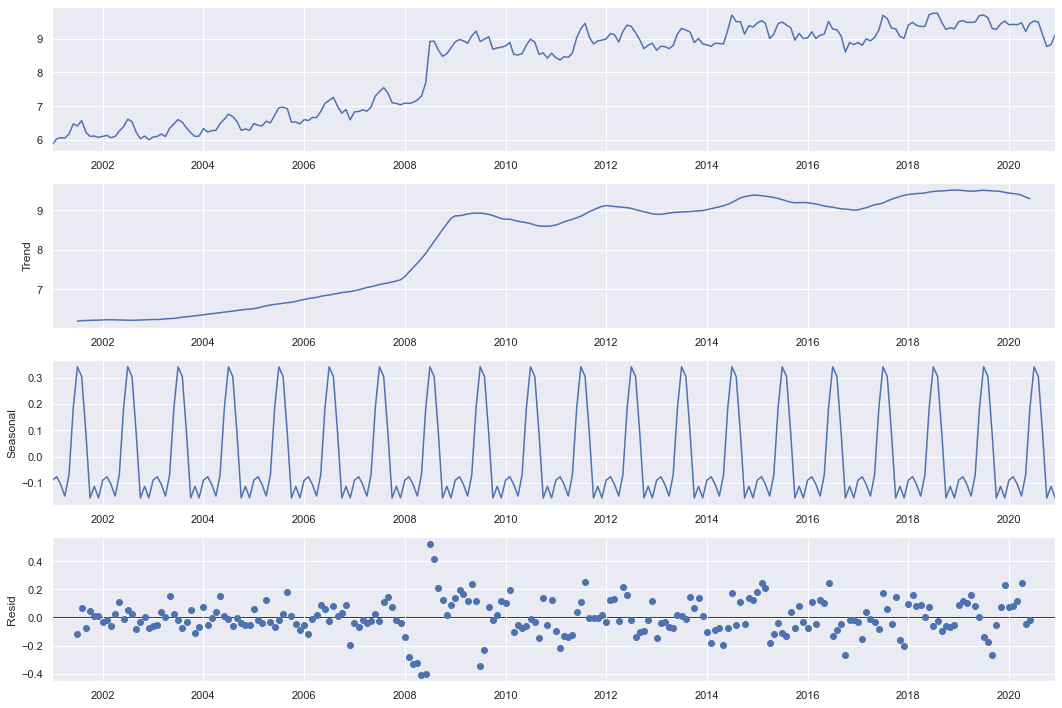

In [199]:
#Decompose the data to see if there are any trends and seasonality.
deco = sm.tsa.seasonal_decompose(ts_dat, model='additive')
fig = deco.plot()
plt.savefig('decompose.png')
plt.show()

In [150]:
#Load theseasonalit to a new object.
seasonality = deco.seasonal

#### Merge all the data

In [151]:
#Merge them all together.
full_data = generation_monthly.merge(consumption_monthly, on='DATE').merge(multiTimeline,on='DATE', how = "left").merge(average_temperature, on='DATE').merge(precipitation, on='DATE').merge(price, on='DATE')

In [152]:
full_data_two = full_data.merge(coalprice,on='DATE', how = "left").merge(Naturalgas_price,on='DATE', how = "left").merge(petroleum_price,on='DATE', how = "left").merge(pd.DataFrame(seasonality).reset_index(), how= "left")

In [153]:
#Take a look.
full_data_two

,DATE,GENERATION\n(Megawatthours),Coal (Short Tons),Natural Gas (Mcf),Other Gases (Billion BTU),Petroleum (Barrels),internet_search,AverageTemperature,Precipitation,covid,PRICE(Cents/kWh.5),coal_price,naturalgas_price,petroleum_price,seasonal
0,2001-01-01,7117068.0,1394053.0,1744687.0,0.0,1019395.0,NaN,34.3,2.27,0,5.86,NaN,NaN,NaN,-0.089474
1,2001-02-01,5894142.0,1225213.0,809796.0,0.0,525230.0,NaN,41.2,2.01,0,6.03,NaN,NaN,NaN,-0.076425
2,2001-03-01,6358233.0,1312509.0,732833.0,0.0,1170501.0,NaN,42.0,4.45,0,6.06,NaN,NaN,NaN,-0.105000
3,2001-04-01,6108458.0,1142288.0,1217777.0,0.0,1085490.0,NaN,56.6,1.64,0,6.05,NaN,NaN,NaN,-0.149846
4,2001-05-01,5592002.0,1129454.0,1012305.0,0.0,400489.0,NaN,63.0,4.88,0,6.17,NaN,NaN,NaN,-0.069035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2020-08-01,10066339.0,336033.0,45822538.0,0.0,78779.0,72,75.5,8.20,1,9.50,55.64,2.12,102.29,0.304254
236,2020-09-01,7691990.0,69319.0,36587665.0,0.0,69386.0,67,66.4,6.31,1,9.12,55.64,1.96,70.22,0.086272
237,2020-10-01,7007291.0,27096.0,32076827.0,0.0,32886.0,69,59.0,5.07,1,8.77,55.64,1.97,59.58,-0.157039
238,2020-11-01,6938746.0,93992.0,25479817.0,0.0,54436.0,69,51.3,5.15,1,8.83,53.35,2.63,NaN,-0.112829


# EDA

In [154]:
full_data_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DATE                        240 non-null    datetime64[ns]
 1   GENERATION
(Megawatthours)  240 non-null    float64       
 2   Coal (Short Tons)           240 non-null    float64       
 3   Natural Gas (Mcf)           240 non-null    float64       
 4   Other Gases (Billion BTU)   240 non-null    float64       
 5   Petroleum (Barrels)         240 non-null    float64       
 6   internet_search             204 non-null    object        
 7   AverageTemperature          240 non-null    object        
 8   Precipitation               240 non-null    object        
 9   covid                       240 non-null    int64         
 10  PRICE(Cents/kWh.5)          240 non-null    float64       
 11  coal_price                  156 non-null    float64       

In [155]:
#Change the data types to the proper ones.
for col in ['internet_search', 'AverageTemperature', 'Precipitation']:
    full_data_two[col] = full_data_two[col].astype('float64')

full_data_two['covid'] = full_data_two['covid'].astype('category')

<AxesSubplot:>

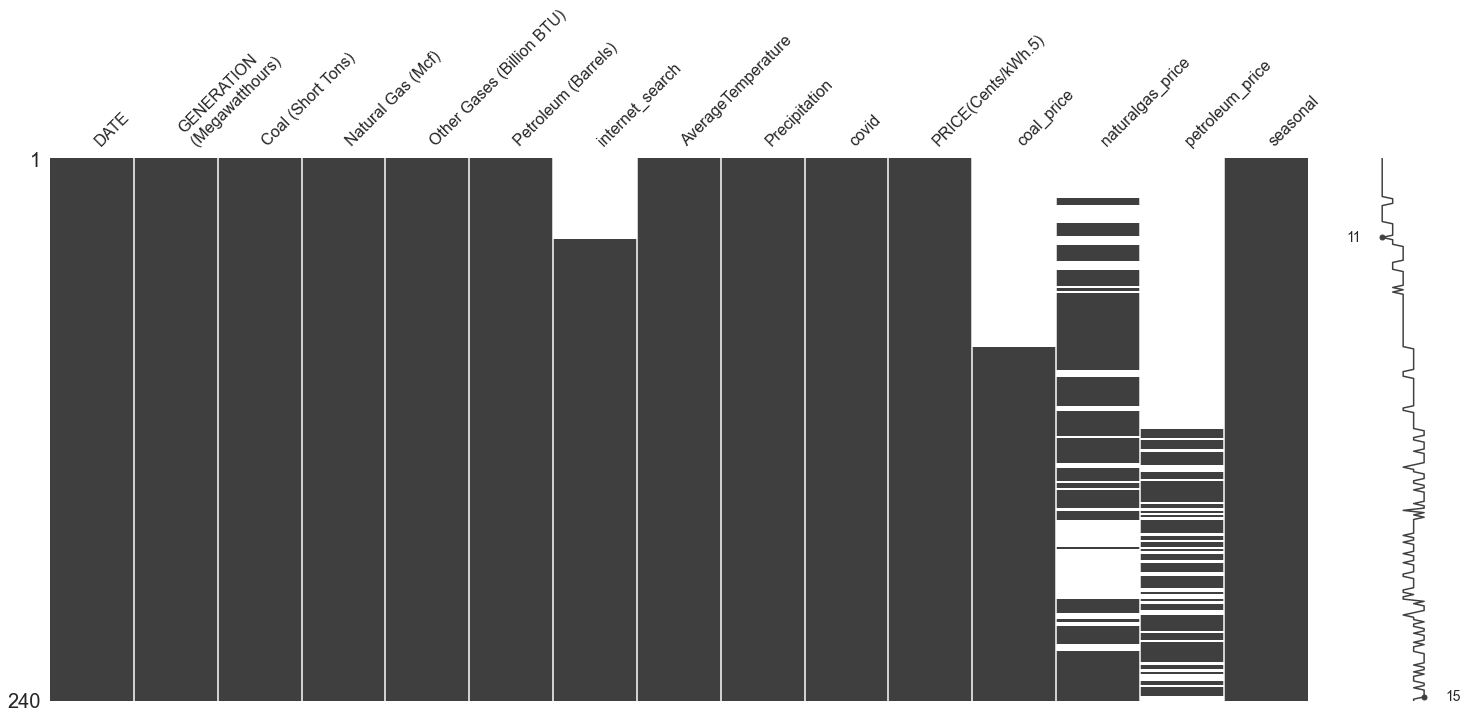

In [157]:
#Check the missing values.
miss.matrix(full_data_two)

#### Dealing  with missing value

In [209]:
#Copy the dataframe that we want to inpute.
dta_impute = full_data_two.copy()

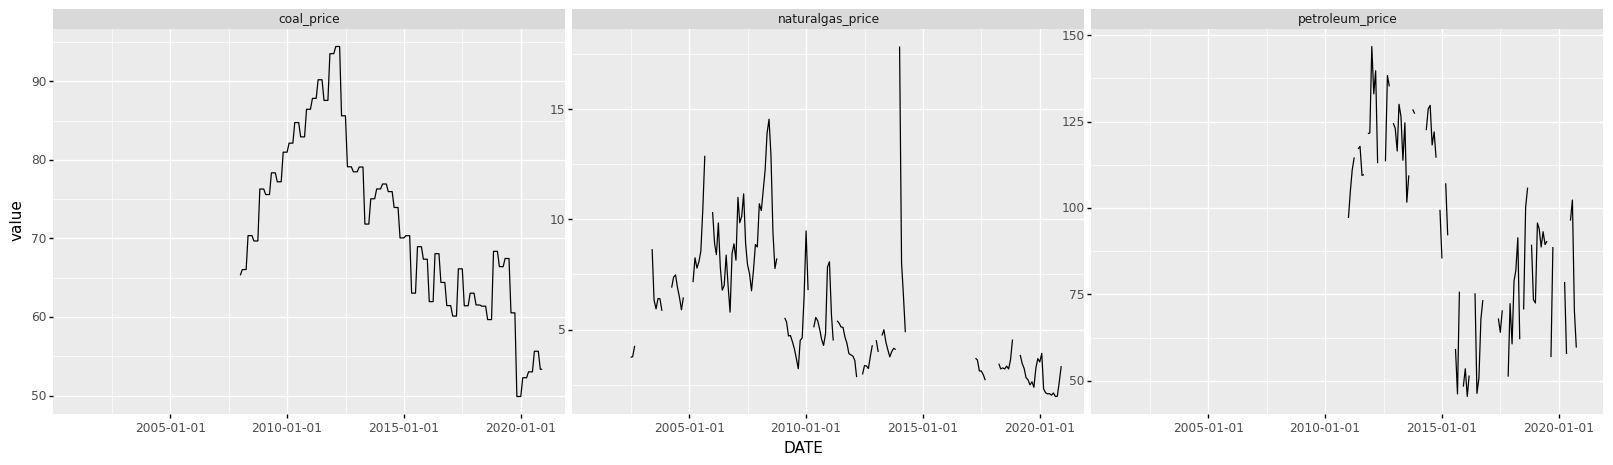

<ggplot: (8779751810030)>

In [213]:
(
    ggplot(dta_impute[['coal_price', 'naturalgas_price', 'petroleum_price', "DATE"]].melt(id_vars=["DATE"]),
           aes(x="DATE",y="value"))+
    geom_line() +
    facet_wrap("variable",scales="free") +
    theme(figure_size = (20,5), subplots_adjust={'hspace':0.25}) 
)

In [162]:
#Use other columns to inpute for the misssing values.
trans = IterativeImputer(random_state=0)
fitted = trans.fit(dta_impute.drop(['DATE', 'PRICE(Cents/kWh.5)'], axis= 1))
transformed = fitted.transform(dta_impute.drop(['DATE', 'PRICE(Cents/kWh.5)'], axis= 1))

#Transform the inputed data to dataframe and name the columns.
dta_impute= pd.DataFrame(transformed)
dta_impute.columns = ['GENERATION\n(Megawatthours)', 'Coal (Short Tons)',
       'Natural Gas (Mcf)', 'Other Gases (Billion BTU)', 'Petroleum (Barrels)',
       'internet_search', 'AverageTemperature', 'Precipitation', 'covid','coal_price',
       'naturalgas_price', 'petroleum_price', 'seasonal']

#Add back the price and date. Change the covid into categorical datatype.
dta_impute['PRICE(Cents/kWh.5)'] = full_data_two['PRICE(Cents/kWh.5)']
dta_impute['DATE'] = full_data_two['DATE']
dta_impute['covid'] = dta_impute['covid'].astype('category')

In [163]:
dta_impute

,GENERATION\n(Megawatthours),Coal (Short Tons),Natural Gas (Mcf),Other Gases (Billion BTU),Petroleum (Barrels),internet_search,AverageTemperature,Precipitation,covid,coal_price,naturalgas_price,petroleum_price,seasonal,PRICE(Cents/kWh.5),DATE
0,7117068.0,1394053.0,1744687.0,0.0,1019395.0,36.240142,34.3,2.27,0.0,80.689762,11.093736,122.009580,-0.089474,5.86,2001-01-01
1,5894142.0,1225213.0,809796.0,0.0,525230.0,33.312637,41.2,2.01,0.0,82.220605,9.461056,126.933842,-0.076425,6.03,2001-02-01
2,6358233.0,1312509.0,732833.0,0.0,1170501.0,34.232097,42.0,4.45,0.0,84.219975,10.311758,125.817581,-0.105000,6.06,2001-03-01
3,6108458.0,1142288.0,1217777.0,0.0,1085490.0,37.908464,56.6,1.64,0.0,81.859708,9.039572,124.719264,-0.149846,6.05,2001-04-01
4,5592002.0,1129454.0,1012305.0,0.0,400489.0,34.206991,63.0,4.88,0.0,81.464627,7.909303,127.176433,-0.069035,6.17,2001-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,10066339.0,336033.0,45822538.0,0.0,78779.0,72.000000,75.5,8.20,1.0,55.640000,2.120000,102.290000,0.304254,9.50,2020-08-01
236,7691990.0,69319.0,36587665.0,0.0,69386.0,67.000000,66.4,6.31,1.0,55.640000,1.960000,70.220000,0.086272,9.12,2020-09-01
237,7007291.0,27096.0,32076827.0,0.0,32886.0,69.000000,59.0,5.07,1.0,55.640000,1.970000,59.580000,-0.157039,8.77,2020-10-01
238,6938746.0,93992.0,25479817.0,0.0,54436.0,69.000000,51.3,5.15,1.0,53.350000,2.630000,88.403480,-0.112829,8.83,2020-11-01


#### Explore the data

In [164]:
#Split the data.
y = dta_impute[['PRICE(Cents/kWh.5)']]
X = dta_impute.drop(columns=['PRICE(Cents/kWh.5)','DATE'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .20,random_state=520)

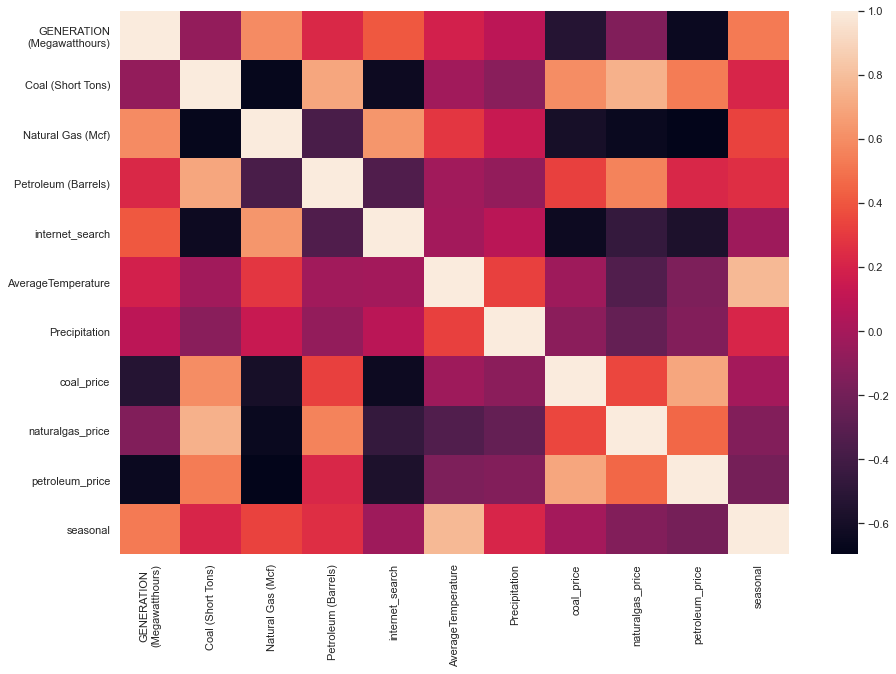

In [220]:
# correlations between features
corr_score = train_X[['GENERATION\n(Megawatthours)', 'Coal (Short Tons)',
       'Natural Gas (Mcf)', 'Petroleum (Barrels)',
       'internet_search', 'AverageTemperature', 'Precipitation', 'covid','coal_price',
       'naturalgas_price', 'petroleum_price', 'seasonal']].corr()

# show heapmap of correlations
sns.heatmap(corr_score)
sns.set(rc = {'figure.figsize':(15,10)})

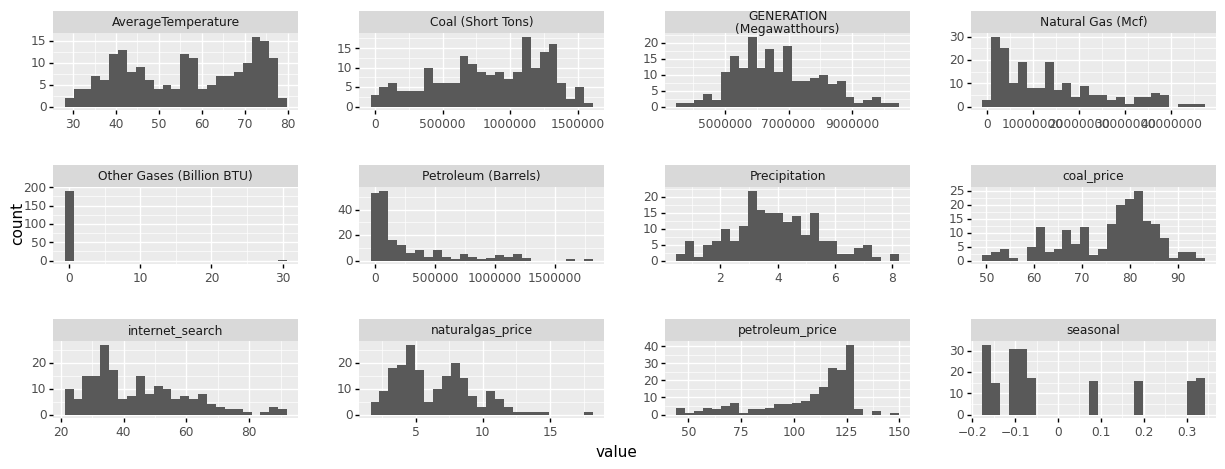

<ggplot: (8779750449478)>

In [174]:
# Plot the continuous Variables 
d = train_X.select_dtypes(include="float").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(15,5),
          subplots_adjust={'wspace':0.25, 'hspace':1})
)

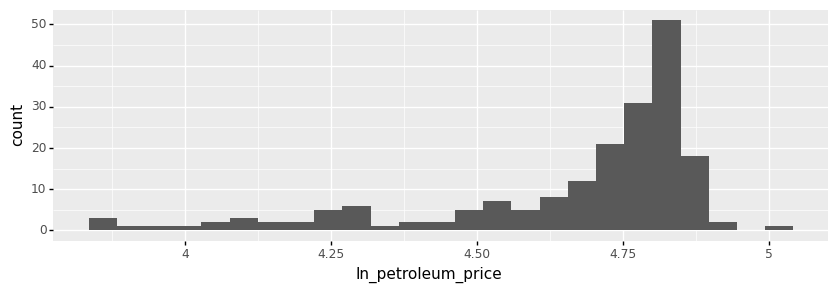

<ggplot: (8779747931564)>

In [167]:
#Try to log the other gases to see if it can solve the unbanlanced situation.
d = train_X.copy()
d['ln_petroleum_price'] =  np.log(d['petroleum_price'] + 1)
(
    ggplot(d,aes(x="ln_petroleum_price")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

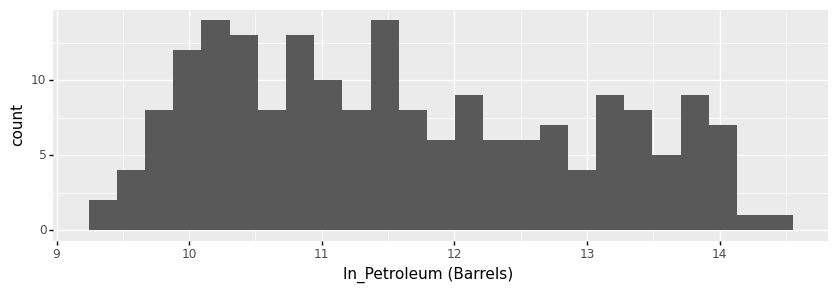

<ggplot: (8779748497966)>

In [168]:
#Try to log the other gases to see if it can solve the unbanlanced situation.
d = train_X.copy()
d['ln_Petroleum (Barrels)'] =  np.log(d['Petroleum (Barrels)'] + 1)
(
    ggplot(d,aes(x="ln_Petroleum (Barrels)")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

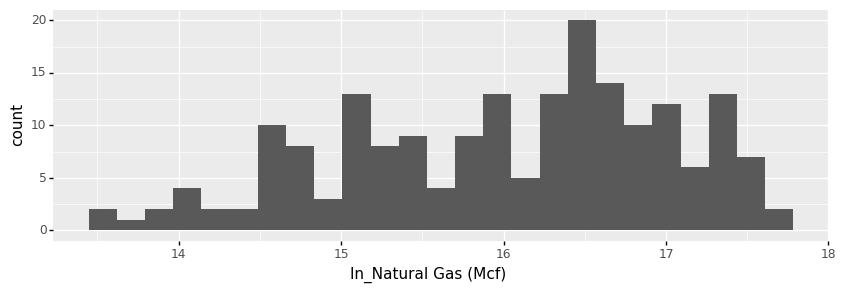

<ggplot: (8779750172534)>

In [169]:
#Try to log the other gases to see if it can solve the unbanlanced situation.
d = train_X.copy()
d['ln_Natural Gas (Mcf)'] =  np.log(d['Natural Gas (Mcf)'] + 1)
(
    ggplot(d,aes(x="ln_Natural Gas (Mcf)")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

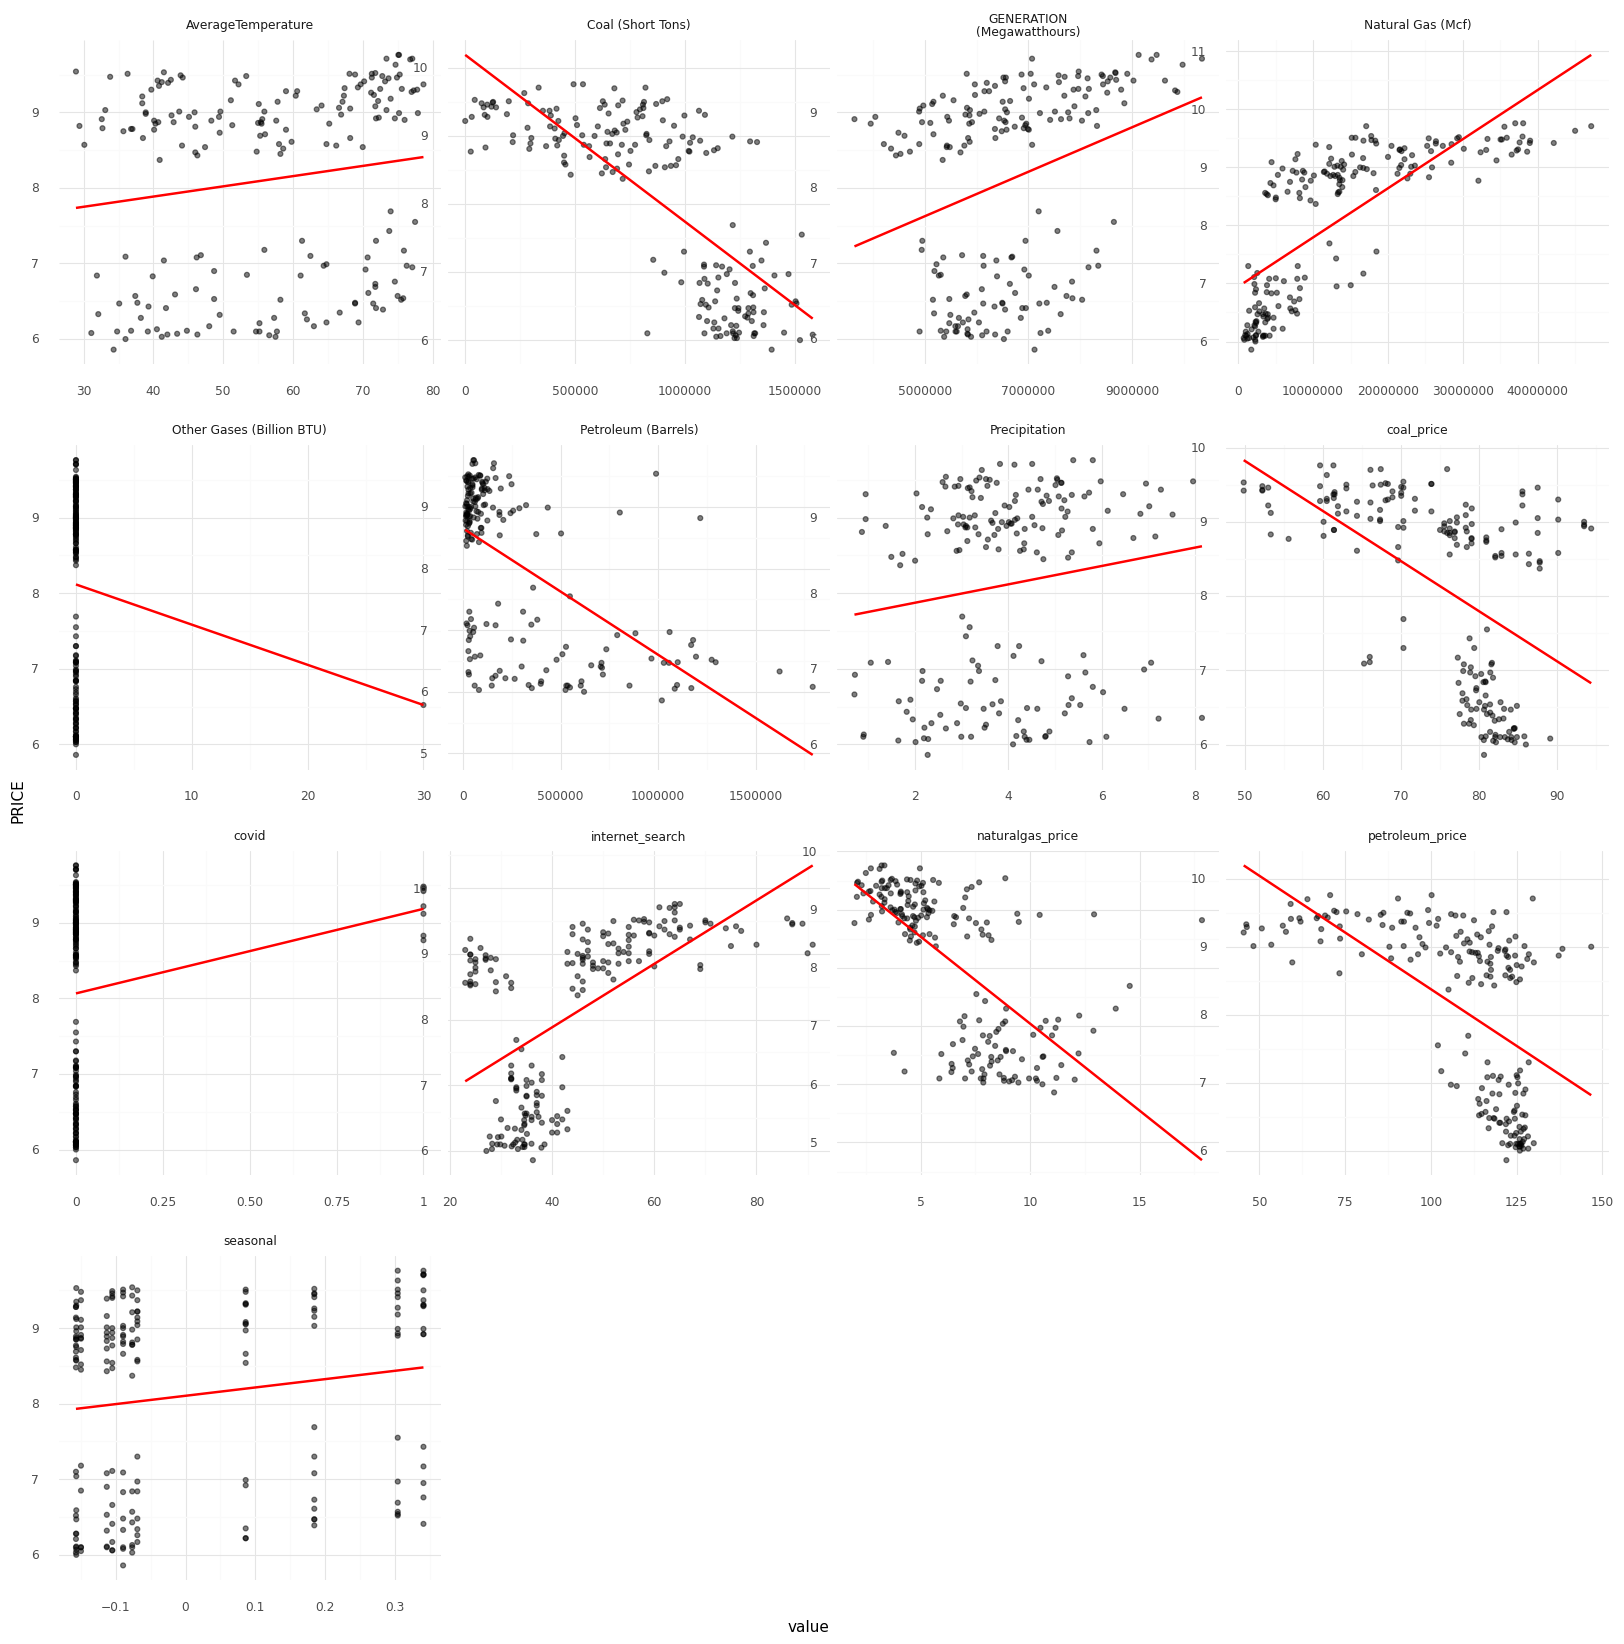

<ggplot: (8779747825785)>

In [175]:
D = train_X.copy()
D['PRICE'] = train_y

(
    ggplot(D.melt(id_vars=["PRICE"]),
           aes(x="value",y="PRICE"))+
    geom_point(alpha=.5) +
    facet_wrap("variable",scales="free") +
    geom_smooth(method="lm",se=False,color="red") +
    theme_minimal() +
    theme(figure_size = (20,20), subplots_adjust={'hspace':0.25}) 
)

In [217]:
D = train_X.copy()
D['PRICE'] = train_y

p=(
    ggplot(D.melt(id_vars=["PRICE"]),
           aes(x="value",y="PRICE"))+
    geom_point(alpha=.5) +
    facet_wrap("variable",scales="free") +
    geom_smooth(method="lm",se=False,color="red") +
    theme(figure_size = (20,20), subplots_adjust={'hspace':0.25}) 
)
p.save(filename = 'simplelm.png', dpi=300)

# Train Models

## High-level preprocessing

In [176]:
#Drop the other gases columns for most of it is 0s.
dta_impute = dta_impute.drop(columns=['Other Gases (Billion BTU)'])

In [177]:
#Log three features to solve the skewed problem.
dta_impute['petroleum_price'] =  np.log(dta_impute['petroleum_price'] + 1)
dta_impute['Petroleum (Barrels)'] =  np.log(dta_impute['Petroleum (Barrels)'] + 1)
dta_impute['Natural Gas (Mcf)'] =  np.log(dta_impute['Natural Gas (Mcf)'] + 1)

In [178]:
#Resplit the data.
y = dta_impute[['PRICE(Cents/kWh.5)']]
X = dta_impute.drop(columns=['PRICE(Cents/kWh.5)', 'DATE'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .20,random_state=520)

### Cross Validation 

In [179]:
# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=10, shuffle=True,random_state=1234)

## Initialize Pipeline

In [180]:
#Set the prepocessing. 
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['GENERATION\n(Megawatthours)', 'Coal (Short Tons)', 'Natural Gas (Mcf)',  'Petroleum (Barrels)', 'internet_search', 'AverageTemperature', 'Precipitation', 'coal_price',
       'naturalgas_price', 'petroleum_price'])])

In [181]:
#Set up the pipeline.
pipe = Pipeline(steps=[('pre_process', preprocess),('model',None)])

## Select Models & Tuning Parameters

In [182]:
#Set the models.
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[3,5,10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,4,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()],
    'model__random_state':[0]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3,4,5],
     'model__n_estimators':[100,300,500,700,900],
    'model__random_state':[0]},
]

## Run Models

In [183]:
#Put it all together in a GridSearch
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

In [184]:
#And Run
search.fit(train_X,train_y['PRICE(Cents/kWh.5)'])

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['GENERATION\n'
                                                                          '(Megawatthours)',
                                                                          'Coal '
                                                                          '(Short '
                                                                          'Tons)',
                                                                          'Natural '
                                                                          'Gas '
                                                                          '(Mcf)',
                           

In [185]:
#Search for the best performer.
search.best_params_

{'model': RandomForestRegressor(max_depth=5, random_state=0),
 'model__max_depth': 5,
 'model__n_estimators': 100,
 'model__random_state': 0}

In [186]:
#Show the score.
search.best_score_

-0.20266427888849609

In [187]:
pred_y = search.predict(test_X)

#Calculate the mse.
m.mean_squared_error(test_y,pred_y)

0.17887976034701106

In [188]:
#See the R2 score.
m.r2_score(test_y,pred_y)

0.8821700593755536

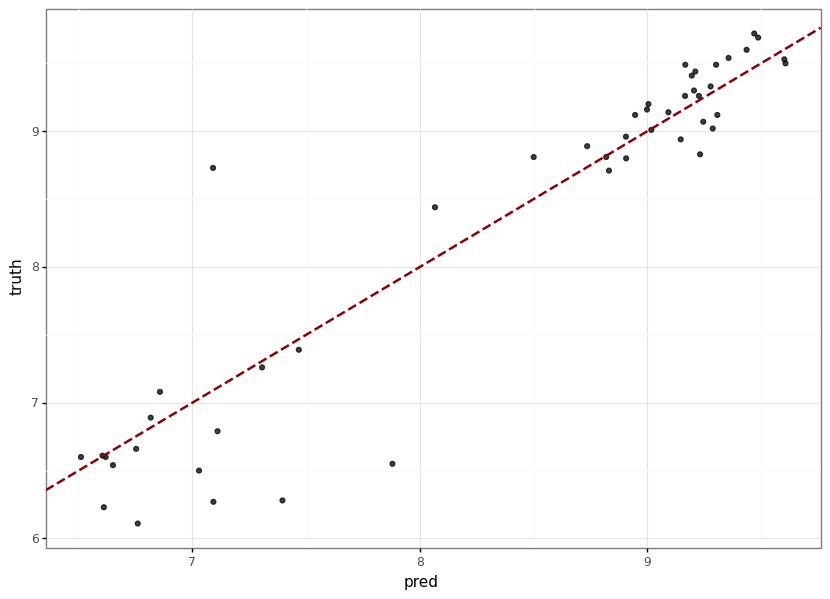

<ggplot: (8779750166363)>

In [189]:
#Plot the regression.
(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y['PRICE(Cents/kWh.5)'])),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(10,7))
)

# Model Interpretation

## Permutation Importance

In [190]:
#Assign the best model to a object.
best_mod = search.best_estimator_

In [191]:
#Innitialize the permutation.
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=25)

In [192]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,Natural Gas (Mcf),0.410649,0.031041,0.348567,0.472732
1,Coal (Short Tons),0.392041,0.029748,0.332544,0.451537
2,internet_search,0.040279,0.005931,0.028416,0.052141
3,coal_price,0.029597,0.003193,0.023210,0.035983
4,petroleum_price,0.013483,0.001835,0.009813,0.017153
5,Petroleum (Barrels),0.011075,0.001602,0.007872,0.014278
6,naturalgas_price,0.007045,0.001315,0.004415,0.009674
7,AverageTemperature,0.006881,0.000735,0.005410,0.008352
8,GENERATION\n(Megawatthours),0.005954,0.000852,0.004250,0.007657
9,Precipitation,0.002190,0.000255,0.001680,0.002699


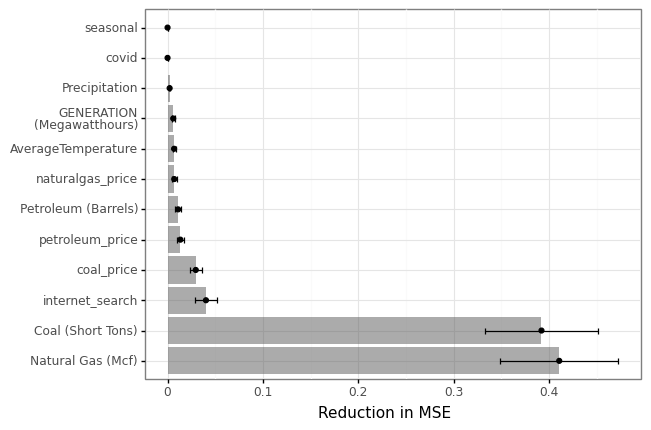

<ggplot: (8779747872010)>

In [193]:
# Plot
(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in MSE",x="")
)

## Partial Dependency Plots

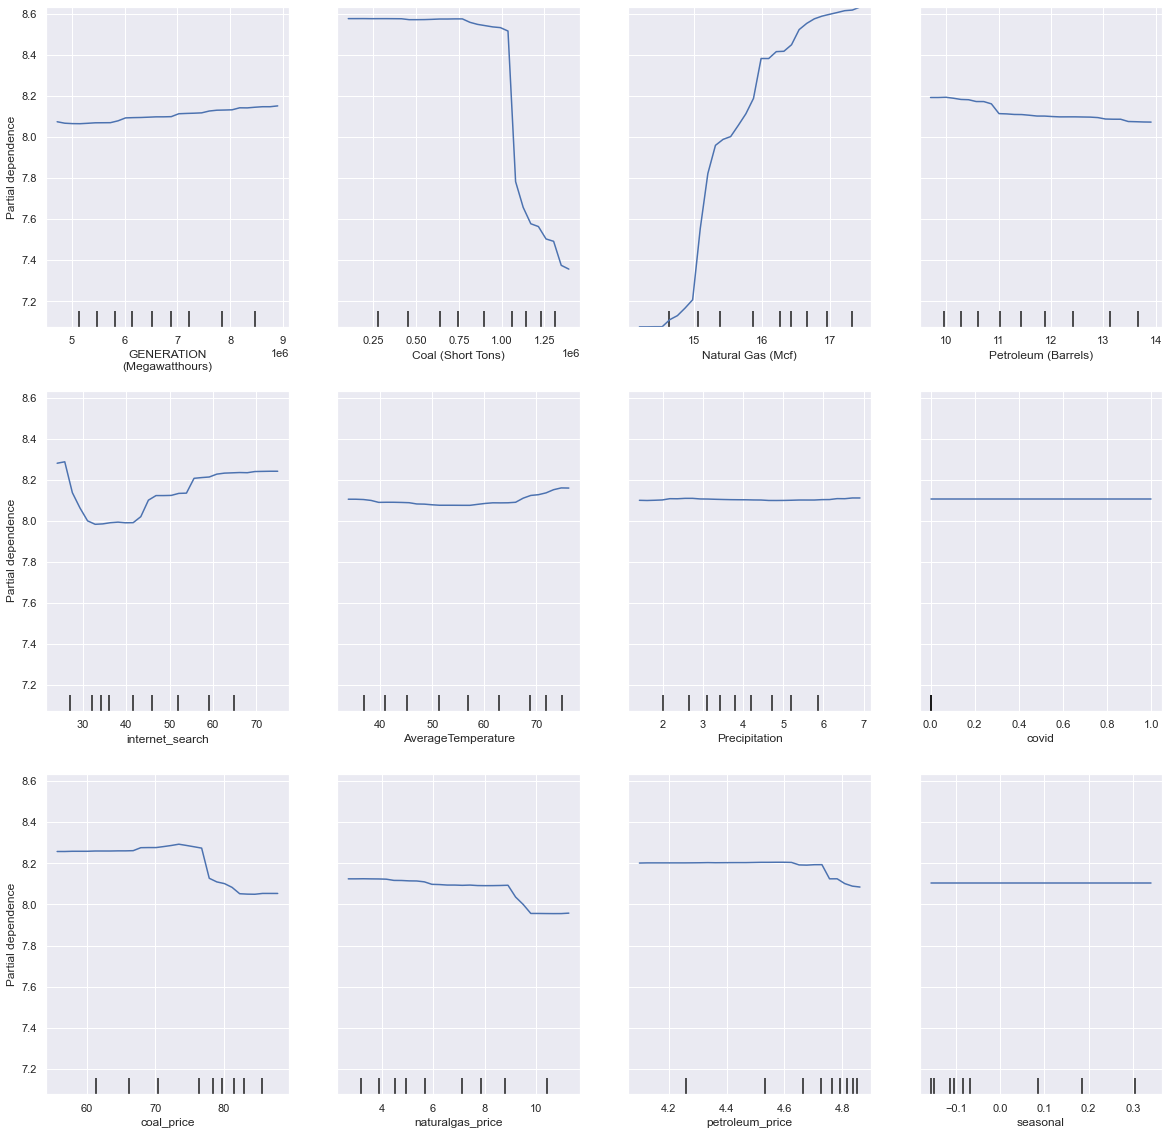

In [200]:
# Target specific features
features = ['GENERATION\n(Megawatthours)', 'Coal (Short Tons)',
       'Natural Gas (Mcf)', 'Petroleum (Barrels)',
       'internet_search', 'AverageTemperature', 'Precipitation', 'covid','coal_price',
       'naturalgas_price', 'petroleum_price','seasonal']

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(20, 20))
display = plot_partial_dependence(
    best_mod, train_X, features,n_cols=4,
    n_jobs=4, grid_resolution=30,ax=ax
)

# display.figure_.set_figwidth(15)
# display.figure_.set_figheight(4)

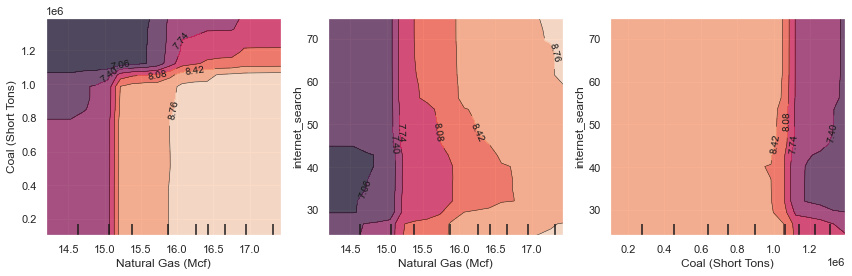

In [201]:
# Feed in the ineraction as a nested list
interacted_features = [['Natural Gas (Mcf)','Coal (Short Tons)'],['Natural Gas (Mcf)','internet_search'],['Coal (Short Tons)','internet_search']] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    best_mod, train_X, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)

fig.tight_layout()

## ICE Plots

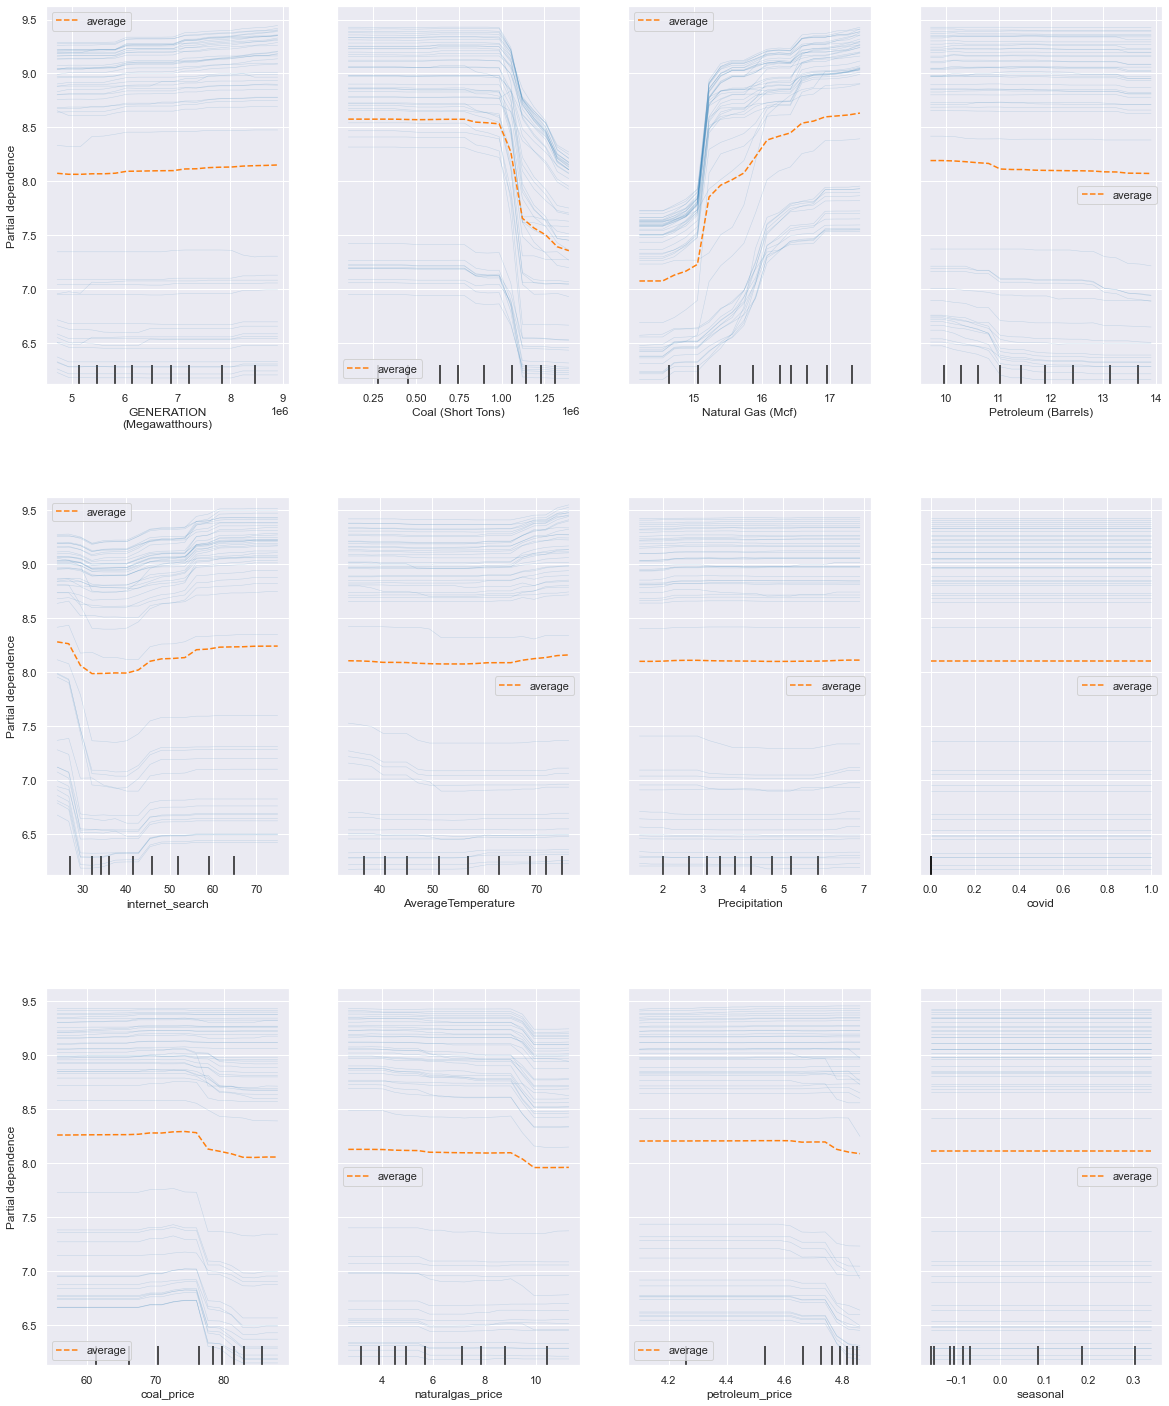

In [202]:
features = ['GENERATION\n(Megawatthours)', 'Coal (Short Tons)',
       'Natural Gas (Mcf)', 'Petroleum (Barrels)',
       'internet_search', 'AverageTemperature', 'Precipitation', 'covid','coal_price',
       'naturalgas_price', 'petroleum_price','seasonal']
fig, ax = plt.subplots(figsize=(20, 25))
display = PartialDependenceDisplay.from_estimator(
    best_mod,
    train_X,
    features,
    kind="both", # "average" = just PDP, "individual" = just ICE
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    n_cols=4,
    ax = ax
)

display.figure_.subplots_adjust(hspace=0.3)